In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from re import compile as re_compile

from test_stationarity import test_stationarity
from interpolationMissingData import interpolateMissingDate,  interpolateMissingDate_quit


In [2]:

%reload_ext autoreload
%autoreload
%matplotlib inline

In [3]:
def interpolateMissingDate_quit(DF):
    DF['Date']=pd.to_datetime(DF.date)
    DF.index=DF.Date
    DF=DF.drop(['Date', 'date'], axis=1) 
    DFd = DF.groupby(pd.Grouper(freq='D')).sum()
    DFd=DFd.replace(0, np.nan)
    DFd=DFd.interpolate(inplace=False, axis=0)
    return DFd


def dataToDatetime(DF):
    DF['date']=pd.to_datetime(DF.Date)
    DF.index=DF.Date
    DF=DF.drop(['Date', 'date'], axis=1) 
    return DF


def interpolateRow(df,date):
    df.loc[Date]=np.nan
    df=df.interpolate(inplace=False, axis=0)
    return df
    


def test_stationaritySimple(timeseries):  
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.DataFrame(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput


def number_stationar_columns(df, critical_value=1):
# critical value must be 1,5 or 10  
    stationar_col=[]
    if critical_value==1:
        for col in df.columns:
            dfoutput= test_stationaritySimple(df[col])
            if dfoutput.iloc[0:1:,[0]].values < dfoutput.iloc[0:1:,[1]].values:
                stationar_col.append(col)
    if critical_value==5:
        for col in df.columns:
            dfoutput= test_stationaritySimple(df[col])
            if dfoutput.iloc[0:1:,[0]].values < dfoutput.iloc[0:1:,[2]].values:
                stationar_col.append(col)
    if critical_value==10:
        for col in df.columns:
            dfoutput= test_stationaritySimple(df[col])
            if dfoutput.iloc[0:1:,[0]].values < dfoutput.iloc[0:1:,[3]].values:
                stationar_col.append(col)
                
    return stationar_col


In [4]:
path="//svm1/home/mfa/common/paysys/protected/acss_paysys/acss_monthly/poclaire"
os.chdir(path)

In [5]:
data=pd.read_csv('1999_2020.csv')

### Interpolate date = '2019-01-31'

In [6]:

#df=dataToDatetime(data)
#df=interpolateRow(df, '2019-01-31')
#df.to_csv('1999-2020-interpolate.csv')


In [7]:

#volumes=[col for col in df.columns if 'vol'in col]
#values=[col for col in df.columns if 'val'in col]
#for col in volumes:
#    plt.figure(figsize=(12,8))
#    plt.plot(df[col].loc['2017-01-31': '2020-12-31'])
#    plt.plot(data[col].loc['2017-01-31': '2020-12-31'])
#    plt.legend(['int', 'act'])
#    plt.ylabel(' '.format(col))
##    plt.xlabel('Date')
#    plt.title('{} Interpolate vs Actual'.format(col))
 #   plt.savefig('Data {} - Interpolate vs Actual'.format(col))

In [8]:
#plt.figure(figsize=(12,8))
#plt.plot(df.value_F.loc['2018-01-31': '2020-12-31'])
#plt.plot(data.value_F.loc['2018-01-31': '2020-12-31'])
#plt.legend(['int', 'act'])

In [9]:
#dataSeasonal.index = df.index
#volumes=[col for col in df.columns if 'vol'in col]
#values=[col for col in df.columns if 'val'in col]
#for col in volumes:
#    plt.figure(figsize=(10,8))
   # plt.plot(df[col].loc['2017-01-31': '2020-12-31'])
#    plt.plot(dataSeasonal[col].loc['2017-01-31': '2020-12-31'])
#    plt.legend(['seasonal'])
 #   plt.ylabel('{} '.format(col))
 #   plt.xlabel('Date')
 #   plt.title('{} Seasonal- Interpolate '.format(col))
 #   plt.savefig('Data Seasonal {} - Interpolate '.format(col))
 #   plt.show()

## Test stationarity of data

In [10]:
dataInterpolate=pd.read_csv('1999-2020-interpolate.csv') #interpolate data
dataInterpolateSeasonal = pd.read_csv('1999-2020-interpolate-Seasonal.csv')
dataInterpolateSeasonal = dataToDatetime(dataInterpolateSeasonal)
dataInterpolate=dataToDatetime(dataInterpolate)

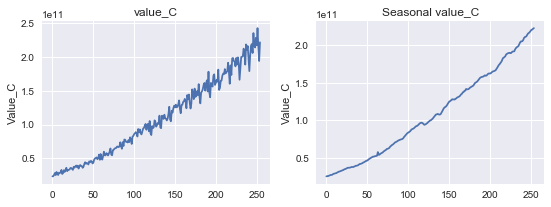

In [11]:
## plot Value_C and Seasonal Value_C
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(dataInterpolate['value_C'].values)     
#plt.xlabel('Date')
plt.ylabel('Value_C')
plt.title('value_C')
plt.subplot(122)
plt.plot(dataInterpolateSeasonal['value_C'].values)
#plt.xlabel('Date')
plt.ylabel('Value_C')
plt.title('Seasonal value_C')
plt.show()

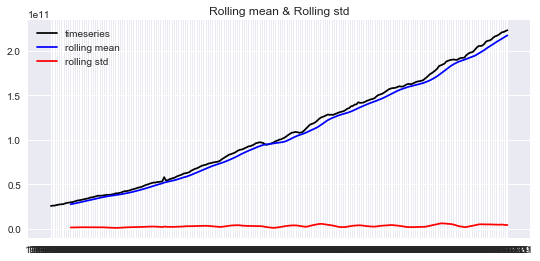

Dickey fuller test is: 
Test Statistic                   2.886726
p-value                          1.000000
#Lags Used                       4.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [12]:
test_stationarity(dataInterpolateSeasonal.value_C)

The dataset full the Fuller - Ducker test because the test statistic is geater than critical values. This was previsible because one has
a positive trend. 

### Remove a trend on the data: 
1. Log transformation 

In [13]:
dataInterpolateSeasonalvalue_C_log = np.log(dataInterpolateSeasonal.value_C)

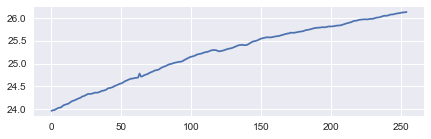

In [14]:
plt.figure(figsize=(7,2))
plt.plot(dataInterpolateSeasonalvalue_C_log.values)
plt.show()

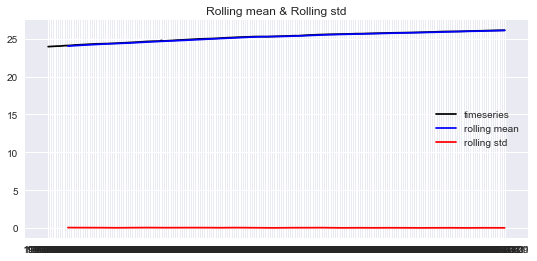

Dickey fuller test is: 
Test Statistic                  -5.320623
p-value                          0.000005
#Lags Used                       1.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [15]:
test_stationarity(dataInterpolateSeasonalvalue_C_log)

One can see that seasonal value_C pass the Ducker fuller test after log transformation.

### Number of columns who pass the stationarity test before and after log transformation.

In [16]:
## number of 0 in each columns
(dataInterpolateSeasonal==0).astype(int).sum(axis=0)

value_C         0
volume_C        0
value_D         0
volume_D        0
value_E         0
volume_E        0
value_F         0
volume_F        0
value_N         0
volume_N        0
value_P         0
volume_P        0
value_X         0
volume_X        0
value_Y         0
volume_Y        0
value_J        77
volume_J       77
value_G       159
volume_G      159
value_M       159
volume_M      159
value_All       0
volume_All      0
dtype: int64

We are going to remove columns value_G, volumes_G, value_J, volumes_J, value_M, volumes_M, because they have a lot of 0.  

In [17]:
cols=[col for col in dataInterpolateSeasonal.columns if not 'G' in col  and 'J' not in col and 'M' not in col]

In [18]:
# log transformation.
data=dataInterpolateSeasonal.copy()
data_log= np.log(data[cols].replace(0,1))

###  Number of stationary columns before log transformation

In [19]:
columns_before_trans= number_stationar_columns(data, critical_value= 10)
print(columns_before_trans)

['value_E', 'volume_F', 'value_P', 'volume_Y']


#### plot stationary columns before tranformation

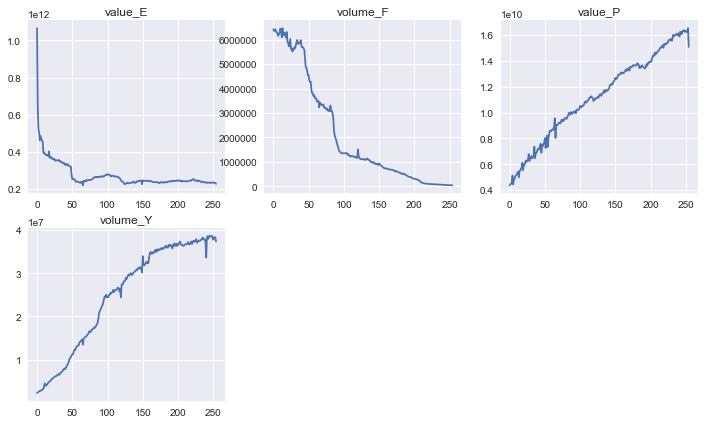

In [20]:
plt.figure(figsize=(12,7))
for i, col in zip(range(1, len(columns_before_trans)+1), columns_before_trans):
    plt.subplot(2, 3, i)
    plt.plot(data[col].values)
    plt.title('{}'.format(col))

###  Number of columns stationar after log transformation

In [21]:
columns_after_trans= number_stationar_columns(data_log, critical_value= 10)
print(columns_after_trans)

['value_C', 'value_D', 'value_P', 'volume_P', 'value_Y', 'volume_Y']


In [22]:
columns_after_trans=[col for col in columns_after_trans if col not in columns_before_trans]
print(columns_after_trans)

['value_C', 'value_D', 'volume_P', 'value_Y']


#### plot stationary columns before tranformation

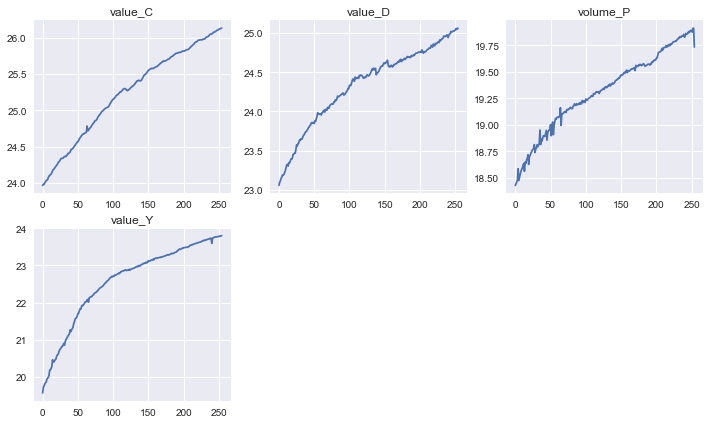

In [23]:
plt.figure(figsize=(12,7))
for i, col in zip(range(1, len(columns_after_trans)+1), columns_after_trans):
    plt.subplot(2, 3, i)
    plt.plot(data_log[col].values)
    plt.title('{}'.format(col))

#### Number of stationary columns 

    

In [24]:
columns_before_after_trans=columns_before_trans + columns_after_trans
print(columns_before_after_trans)

['value_E', 'volume_F', 'value_P', 'volume_Y', 'value_C', 'value_D', 'volume_P', 'value_Y']


In [25]:
columns_non_stationary=[col for col in data_log.columns if col not in columns_before_after_trans]

In [26]:
columns_non_stationary, len(columns_non_stationary)

(['volume_C',
  'volume_D',
  'volume_E',
  'value_F',
  'value_N',
  'volume_N',
  'value_X',
  'volume_X',
  'value_All',
  'volume_All'],
 10)

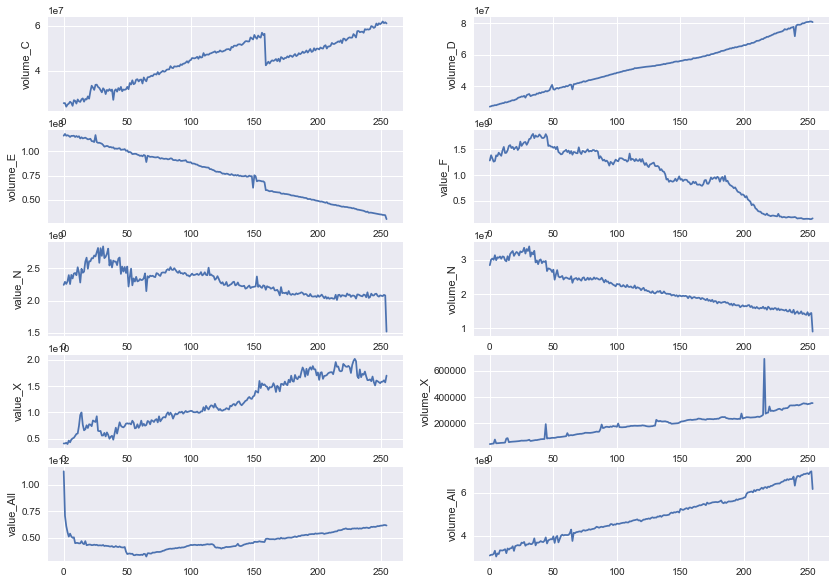

In [27]:
plt.figure(figsize=(14,10))
for i, col in zip(range(1, len(columns_non_stationary)+1), columns_non_stationary):
    plt.subplot(5, 2, i)
    plt.plot(data[col].values)
    plt.ylabel('{}'.format(col))

#### Moving avreage on non stationary columns

In [28]:
df_log= data_log[columns_non_stationary]
moving_avg=df_log.rolling(12).mean()

In [29]:
# remove the trend path
df_log_moving_diff= df_log - moving_avg
df_log_moving_diff1=df_log_moving_diff.copy()
df_log_moving_diff.dropna(inplace=True)
df_log_moving_diff.head(4)


,volume_C,volume_D,volume_E,value_F,value_N,volume_N,value_X,volume_X,value_All,volume_All
Date,,,,,,,,,,
1999-12-31,0.060059,0.037619,-0.009791,0.118241,0.067827,0.016846,0.229115,0.049413,-0.209207,0.042596
2000-01-31,0.026012,0.048722,-0.002517,0.030096,0.026659,-0.020546,0.394477,0.056953,-0.141776,0.045648
2000-02-29,0.014459,0.035804,-0.019413,0.030490,-0.037703,-0.029850,0.569723,0.452698,-0.102327,-0.012861
2000-03-31,0.047261,0.036490,-0.007372,0.054843,0.043585,0.017336,0.547912,0.433835,-0.034584,0.046236


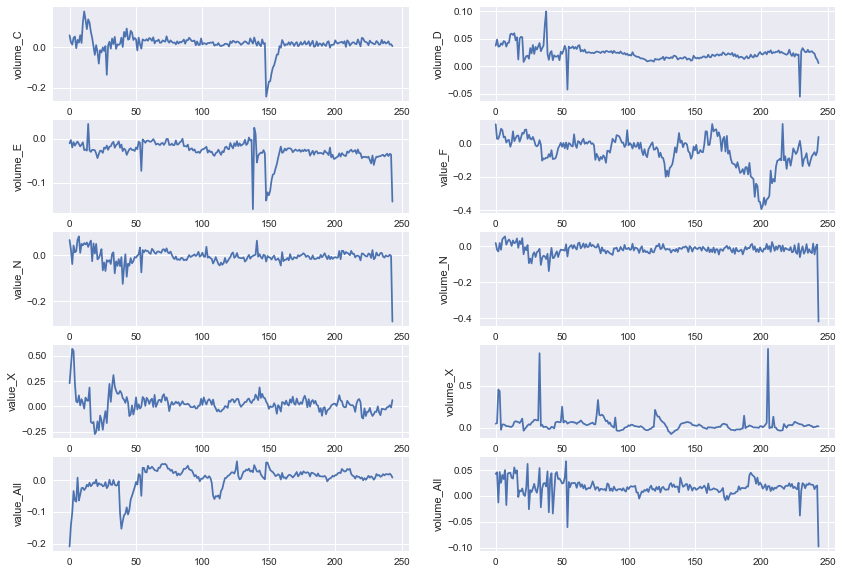

In [30]:
# plot the dataset after removing the trend path
plt.figure(figsize=(14,10))
for i, col in zip(range(1, len(columns_non_stationary)+1), columns_non_stationary):
    plt.subplot(5, 2, i)
    plt.plot(df_log_moving_diff[col].values)
    plt.ylabel('{}'.format(col))

#### Test of seasonality

In [31]:
columns_after_trans_diff = number_stationar_columns(df_log_moving_diff, critical_value= 10)

In [32]:
len(columns_after_trans_diff)
col_failled=[col for col in columns_non_stationary if col not in columns_after_trans_diff ]
col_failled

['value_F']

Just one column failled the Ducker fuller test, value_F

#### Make column value_F stationary

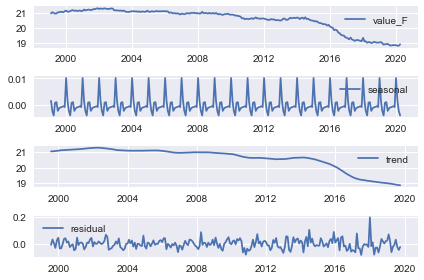

In [33]:

## seasonal decomposition 
data_log.index = pd.to_datetime(data_log.index)
decomposition=seasonal_decompose(data_log['value_F'])
seasonal=decomposition.seasonal
trend=decomposition.trend
residual = decomposition.resid
plt.subplot(411)
plt.plot(data_log.value_F, label='value_F')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


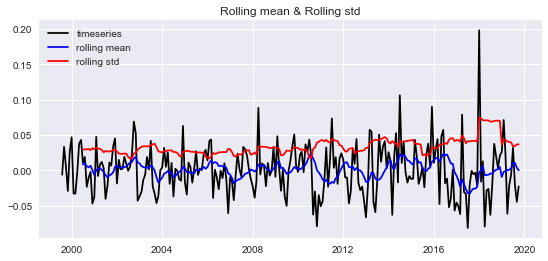

Dickey fuller test is: 
Test Statistic                -5.982105e+00
p-value                        1.828169e-07
#Lags Used                     1.100000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64


In [34]:
residual1=residual.copy()
residual.dropna(inplace=True)
test_stationarity(residual)

So the value_F win the Ducker - Fuller test becouse the Test Statistic is less than critical values

### Get the full stationary dataset 

In [35]:
# stationary columns( before, after log transformation), after rolling mean and residual for value_F.
data_stationary=pd.concat([  data_log[columns_after_trans],df_log_moving_diff1[columns_after_trans_diff],  residual1, data[columns_before_trans]], axis=1)
data_stationary.rename(columns={'resid': 'value_F'}, inplace=True)
data_stationary.to_csv('1999_2000-stationary.csv')

In [36]:
data[columns_before_trans] #, residual

,value_E,volume_F,value_P,volume_Y
Date,,,,
1999-01-31,1.065603e+12,6.431264e+06,4.358457e+09,2.308692e+06
1999-02-28,6.437760e+11,6.355099e+06,4.437885e+09,2.401387e+06
1999-03-31,5.246539e+11,6.372685e+06,4.485629e+09,2.593583e+06
1999-04-30,5.032694e+11,6.421651e+06,4.625603e+09,2.675805e+06
1999-05-31,4.623004e+11,6.314249e+06,5.122244e+09,2.752790e+06
...,...,...,...,...
2019-11-30,2.350633e+11,4.450574e+04,1.627242e+10,3.772798e+07
2019-12-31,2.330121e+11,4.055877e+04,1.622695e+10,3.819088e+07
2020-01-31,2.331448e+11,4.843036e+04,1.636645e+10,3.836781e+07


In [37]:
data_stationary

,value_C,value_D,volume_P,value_Y,volume_C,volume_D,volume_E,value_N,volume_N,value_X,volume_X,value_All,volume_All,value_F,value_E,volume_F,value_P,volume_Y
Date,,,,,,,,,,,,,,,,,,
1999-01-31,23.965121,23.055420,18.426766,19.569205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.065603e+12,6.431264e+06,4.358457e+09,2.308692e+06
1999-02-28,23.979356,23.096019,18.443255,19.718014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.437760e+11,6.355099e+06,4.437885e+09,2.401387e+06
1999-03-31,23.980057,23.114700,18.458357,19.758477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.246539e+11,6.372685e+06,4.485629e+09,2.593583e+06
1999-04-30,24.000110,23.144252,18.473044,19.804111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.032694e+11,6.421651e+06,4.625603e+09,2.675805e+06
1999-05-31,24.014228,23.160366,18.583791,19.845804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.623004e+11,6.314249e+06,5.122244e+09,2.752790e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,26.112878,25.038634,19.888099,23.775367,0.022693,0.024871,-0.033687,-0.003717,0.013901,-0.007071,0.005350,0.018229,0.021127,NaN,2.350633e+11,4.450574e+04,1.627242e+10,3.772798e+07
2019-12-31,26.119780,25.055773,19.875452,23.789507,0.030414,0.022968,-0.039096,-0.003874,-0.046664,-0.004518,0.012137,0.017183,0.012937,NaN,2.330121e+11,4.055877e+04,1.622695e+10,3.819088e+07
2020-01-31,26.121428,25.046498,19.912838,23.786304,0.014199,0.015614,-0.034028,0.003418,-0.005537,0.012181,0.011864,0.019906,0.018467,NaN,2.331448e+11,4.843036e+04,1.636645e+10,3.836781e+07


In [38]:
data_stationary.head(14)

,value_C,value_D,volume_P,value_Y,volume_C,volume_D,volume_E,value_N,volume_N,value_X,volume_X,value_All,volume_All,value_F,value_E,volume_F,value_P,volume_Y
Date,,,,,,,,,,,,,,,,,,
1999-01-31,23.965121,23.055420,18.426766,19.569205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.065603e+12,6.431264e+06,4.358457e+09,2.308692e+06
1999-02-28,23.979356,23.096019,18.443255,19.718014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.437760e+11,6.355099e+06,4.437885e+09,2.401387e+06
1999-03-31,23.980057,23.114700,18.458357,19.758477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.246539e+11,6.372685e+06,4.485629e+09,2.593583e+06
1999-04-30,24.000110,23.144252,18.473044,19.804111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.032694e+11,6.421651e+06,4.625603e+09,2.675805e+06
1999-05-31,24.014228,23.160366,18.583791,19.845804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.623004e+11,6.314249e+06,5.122244e+09,2.752790e+06
1999-06-30,24.031842,23.188032,18.472517,19.857287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.850660e+11,6.303471e+06,4.429495e+09,2.783972e+06
1999-07-31,24.035703,23.184890,18.505474,19.933190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006171,4.730230e+11,6.249131e+06,4.838737e+09,2.923614e+06
1999-08-31,24.044555,23.195330,18.533796,19.967912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033305,4.603592e+11,6.156483e+06,4.884674e+09,3.039021e+06
1999-09-30,24.072820,23.217836,18.558824,19.987447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005137,4.561757e+11,6.235242e+06,5.050689e+09,3.115465e+06


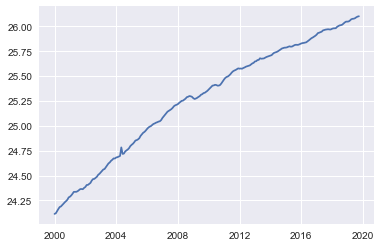

In [41]:
data_stationary.dropna(inplace=True)
